**TAREA 5 - 
PROYECTO ANÁLISIS DE DATOSs**

**Realizado por:**

**LUIS CARLOS PIMIENTA HENAO**

**Grupo: 202016908_1**

**UNIVERSIDAD NACIONAL ABIERTA Y A DISTANCIA - UNAD**

**PROGRAMA DE INGENIERIA DE SISTEMAS**

**ANALISIS DE DATOS**

**BARRANQUILLA (ATLÁNTICO)**

**MAYO 2024***

**REGRESION LOGISTICA**

**1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.**

In [1]:
#Cargar Librerias.

import pandas as pd
import sklearn.metrics
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Cargar libreria implementar modelos ciencia de datos.
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import  mean_squared_error, mean_absolute_error, r2_score,accuracy_score
from sklearn.linear_model import LogisticRegression #(Libreria Regresión Logistica)
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [2]:
#Lectura datos Pyton y se cargan las variables

Datos = pd.read_csv('Titanic-Dataset.csv')

In [3]:
Datos.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
Datos.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
Datos.shape

(891, 12)

In [6]:
Datos.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

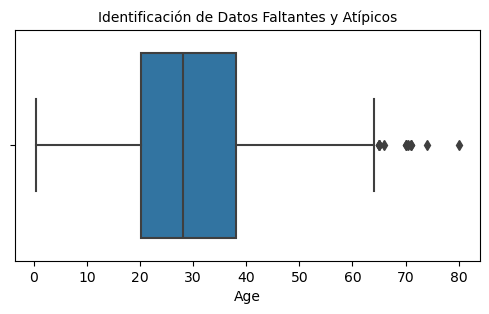

In [7]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Age']) # Age = Edad
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10)

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

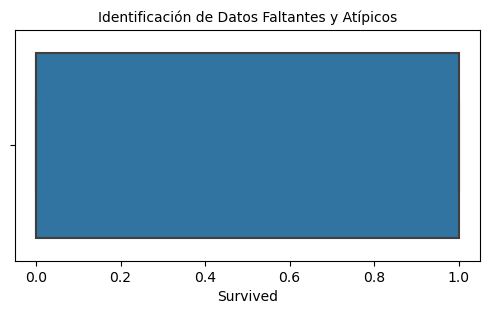

In [8]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Survived']) # Survived = Sobrevivio
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10)

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

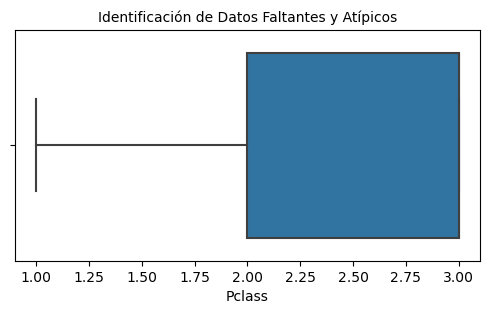

In [9]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Pclass']) # Survived = Sobrevivio
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10)

**2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.**

In [10]:
# Analizamos si el registro selecionado tiene espacion en blanco

print("Cantidad de Registros con cero en Id Pasajeros: ", Datos['PassengerId'].isin([0]).sum())
print("Cantidad de Registros con cero en Sobrevivio: ", Datos['Survived'].isin([0]).sum())
print("Cantidad de Registros con cero en Clase: ", Datos['Pclass'].isin([0]).sum())
print("Cantidad de Registros con cero en Edad: ", Datos['Age'].isin([0]).sum())
print("Cantidad de Registros con cero en Hermanos: ", Datos['SibSp'].isin([0]).sum())
print("Cantidad de Registros con cero en Parch: ", Datos['Parch'].isin([0]).sum())
print("Cantidad de Registros con cero en Tickete: ", Datos['Ticket'].isin([0]).sum())
print("Cantidad de Registros con cero en Tarifa: ", Datos['Fare'].isin([0]).sum())
print("Cantidad de Registros con cero en Cabina: ", Datos['Cabin'].isin([0]).sum())
print("Cantidad de Registros con cero en Embarcación: ", Datos['Embarked'].isin([0]).sum())


Cantidad de Registros con cero en Id Pasajeros:  0
Cantidad de Registros con cero en Sobrevivio:  549
Cantidad de Registros con cero en Clase:  0
Cantidad de Registros con cero en Edad:  0
Cantidad de Registros con cero en Hermanos:  608
Cantidad de Registros con cero en Parch:  678
Cantidad de Registros con cero en Tickete:  0
Cantidad de Registros con cero en Tarifa:  15
Cantidad de Registros con cero en Cabina:  0
Cantidad de Registros con cero en Embarcación:  0


In [11]:
# Los espacios en blanco se le asignan valores en cero (0)

Datos ['Survived']=Datos['Survived'].replace(0,Datos['Survived'].mean())
Datos ['SibSp']=Datos['SibSp'].replace(0,Datos['SibSp'].mean())
Datos ['Parch']=Datos['Parch'].replace(0,Datos['Parch'].mean())
Datos ['Fare']=Datos['Fare'].replace(0,Datos['Fare'].mean())


In [12]:
# Se valida de nuevo los espacios en blanco 

print("Cantidad de Registros con cero en Id Pasajeros: ", Datos['PassengerId'].isin([0]).sum())
print("Cantidad de Registros con cero en Sobrevivio: ", Datos['Survived'].isin([0]).sum())
print("Cantidad de Registros con cero en Clase: ", Datos['Pclass'].isin([0]).sum())
print("Cantidad de Registros con cero en Edad: ", Datos['Age'].isin([0]).sum())
print("Cantidad de Registros con cero en Hermanos: ", Datos['SibSp'].isin([0]).sum())
print("Cantidad de Registros con cero en Parch: ", Datos['Parch'].isin([0]).sum())
print("Cantidad de Registros con cero en Tickete: ", Datos['Ticket'].isin([0]).sum())
print("Cantidad de Registros con cero en Tarifa: ", Datos['Fare'].isin([0]).sum())
print("Cantidad de Registros con cero en Cabina: ", Datos['Cabin'].isin([0]).sum())
print("Cantidad de Registros con cero en Embarcación: ", Datos['Embarked'].isin([0]).sum())

Cantidad de Registros con cero en Id Pasajeros:  0
Cantidad de Registros con cero en Sobrevivio:  0
Cantidad de Registros con cero en Clase:  0
Cantidad de Registros con cero en Edad:  0
Cantidad de Registros con cero en Hermanos:  0
Cantidad de Registros con cero en Parch:  0
Cantidad de Registros con cero en Tickete:  0
Cantidad de Registros con cero en Tarifa:  0
Cantidad de Registros con cero en Cabina:  0
Cantidad de Registros con cero en Embarcación:  0


In [13]:
Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    float64
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    float64
 7   Parch        891 non-null    float64
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(5), int64(2), object(5)
memory usage: 83.7+ KB


In [14]:
Encoder=LabelEncoder()
Datos["Sex"]=Encoder.fit_transform(Datos["Sex"])
Datos["Sex"]

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int32

In [15]:
Datos['Survived'] = Datos['Survived'].astype(int)
Datos['Pclass'] = Datos['Pclass'].astype(int)
Datos['Sex'] = Datos['Sex'].astype(int)
#Datos['Age'] = Datos['Age'].astype(int)

In [16]:
Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int32  
 2   Pclass       891 non-null    int32  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int32  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    float64
 7   Parch        891 non-null    float64
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(4), int32(3), int64(1), object(4)
memory usage: 73.2+ KB


**3.	Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.**

In [17]:
Datos[['Survived']].value_counts()

Survived
0           549
1           342
Name: count, dtype: int64

In [18]:
Datos[['Age']].value_counts()

Age  
24.00    30
22.00    27
18.00    26
30.00    25
28.00    25
         ..
20.50     1
14.50     1
12.00     1
0.92      1
80.00     1
Name: count, Length: 88, dtype: int64

In [19]:
Datos[['Sex']].value_counts()

Sex
1      577
0      314
Name: count, dtype: int64

In [20]:
Datos[['Pclass']].value_counts()

Pclass
3         491
1         216
2         184
Name: count, dtype: int64

In [21]:
Datos[['Survived','Age','Sex','Pclass']].head(10)

,Survived,Age,Sex,Pclass
0,0,22.0,1,3
1,1,38.0,0,1
2,1,26.0,0,3
3,1,35.0,0,1
4,0,35.0,1,3
5,0,NaN,1,3
6,0,54.0,1,1
7,0,2.0,1,3
8,1,27.0,0,3
9,1,14.0,0,2


**4.	Dividir el dataset en Train y Test para evaluar correctamente el modelo.**

In [22]:
X = Datos[['Age','Sex','Pclass']]
Y = Datos['Survived']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [23]:
print(X_train)

      Age  Sex  Pclass
105  28.0    1       3
68   17.0    0       3
253  30.0    1       3
320  22.0    1       3
706  45.0    0       2
..    ...  ...     ...
835  39.0    0       1
192  19.0    0       3
629   NaN    1       3
559  36.0    0       3
684  60.0    1       2

[668 rows x 3 columns]


In [24]:
print (Y_train)

105    0
68     1
253    0
320    0
706    1
      ..
835    1
192    1
629    0
559    1
684    0
Name: Survived, Length: 668, dtype: int32


**5.	Entrenar el modelo configurando los diferentes hiperparámetros.**

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
modelo_regresion = LogisticRegression()
modelo_regresion.fit = (X_train, Y_train)
Prediccion = modelo_regresion.predict = (X_test)

In [27]:
print (Y_test)

495    0
648    0
278    0
31     1
255    1
      ..
167    0
306    1
379    0
742    1
10     1
Name: Survived, Length: 223, dtype: int32


In [28]:
print (Prediccion)

      Age  Sex  Pclass
495   NaN    1       3
648   NaN    1       3
278   7.0    1       3
31    NaN    0       1
255  29.0    0       3
..    ...  ...     ...
167  45.0    0       3
306   NaN    0       1
379  19.0    1       3
742  21.0    0       1
10    4.0    0       3

[223 rows x 3 columns]


**6.	Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.**

In [29]:
from sklearn.metrics import classification_report
print(classification_report(Y, Y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       549
           1       1.00      1.00      1.00       342

    accuracy                           1.00       891
   macro avg       1.00      1.00      1.00       891
weighted avg       1.00      1.00      1.00       891



**7.	Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.**

In [30]:
Datos.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1.000000,0.381594,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1.000000,0.381594,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0.523008,0.381594,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1.000000,0.381594,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0.523008,0.381594,373450,8.0500,NaN,S


In [31]:
Y = Datos[['Age','Sex','Pclass']]
Y = Datos['Survived']

In [32]:
confusion_matrix(Y,Y)

array([[549,   0],
       [  0, 342]], dtype=int64)

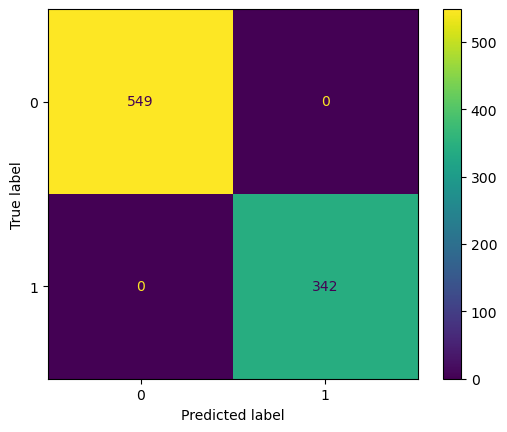

In [33]:
cm = confusion_matrix(Y, Y)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

C:\Users\luis.pimienta.h\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


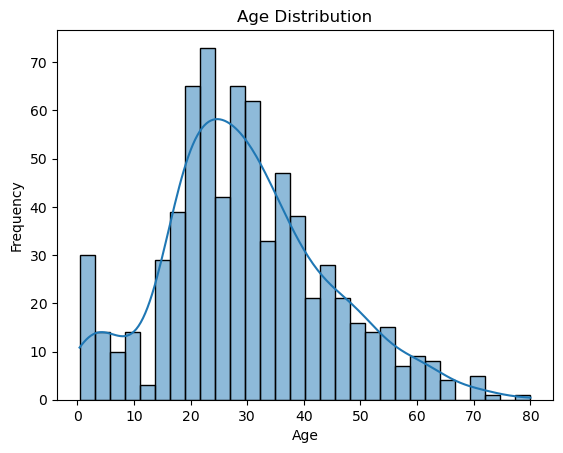

In [34]:
sns.histplot(data=Datos, x='Age', bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()



In [35]:
Genero = Datos['Sex'].value_counts()
Genero

Sex
1    577
0    314
Name: count, dtype: int64

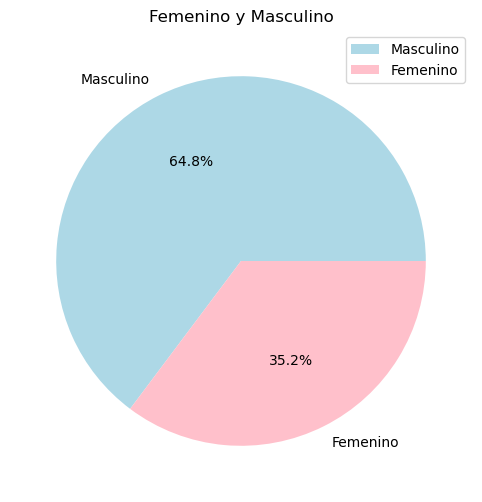

In [36]:
plt.figure(figsize=(10,6))
plt.pie(Genero, labels=['Masculino', 'Femenino'] ,autopct='%.1f%%', colors=['lightblue','pink'])
plt.legend()
plt.title('Femenino y Masculino')
plt.show()

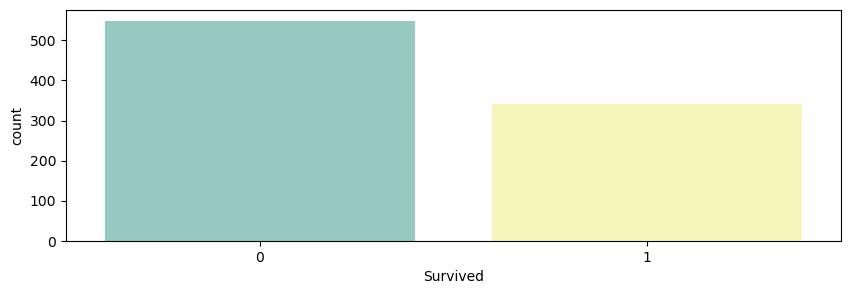

In [37]:
plt.figure(figsize=(10, 3))
sns.countplot(x = "Survived",data=Datos, palette="Set3")
plt.show()

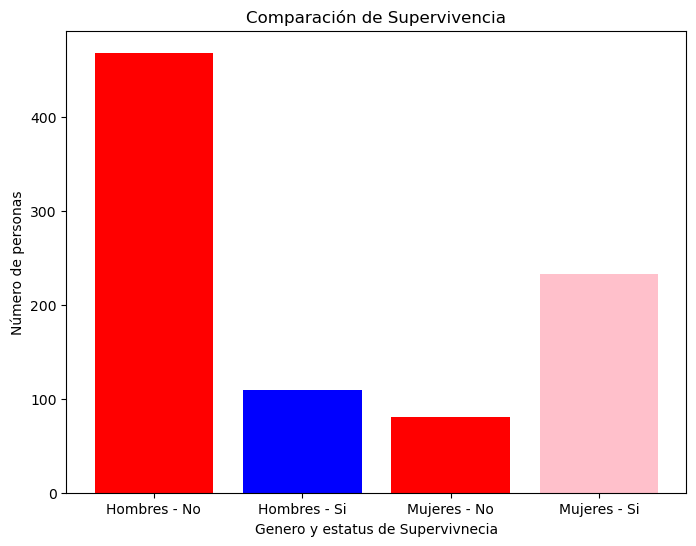

In [38]:
Datos = {'Survived': ['Hombres - No', 'Hombres - Si', 'Mujeres - No', 'Mujeres - Si'],
        'Counts': [468, 109, 81, 233]} 
Survived = pd.DataFrame(Datos)

plt.figure(figsize=(8, 6))
plt.bar(Survived['Survived'], Survived['Counts'],color=["red","blue","red","pink"])
plt.xticks(Survived['Survived'])
plt.title('Comparación de Supervivencia')
plt.xlabel('Genero y estatus de Supervivnecia')
plt.ylabel('Número de personas')
plt.show()